In [253]:
import numpy as np
import matplotlib.pyplot as plt
#Código desarrollado por Daniel Sabogal 

In [465]:
# Función que  genera una configuración de spines al azar de tamaño n 
def crear_red(n):
    red = np.random.randint(0,2,(n,n))
    red[red == 0 ] = -1
    return red

In [466]:
#Función que calcula la energía de la red, aqui se calcula sumando la multiplicacion de columnas y filas, asi se tiene en cuenta y se corrige el sobre conteo.
def energia1(red):
    J=1
    e = 0
    for i in range(n):
        if(i==n-1):
            e = e+ np.sum(red[:,i]*red[:,0])  
        else:
            e = e+ np.sum(red[:,i]*red[:,i+1])       
    for i in range(n):
        if(i==n-1):
            e = e+ np.sum(red[i,:]*red[0,:])  
        else:
            e = e+ np.sum(red[i,:]*red[i+1,:])

    return -J*e


In [467]:
#misma función que calcula la energía pero optimizada
def energia2(red,n):
    J=1
    e = np.sum(red[:,n-1]*red[:,0]) + np.sum(red[n-1,:]*red[0,:])  
    for i in range(n-1):
        e = e+ np.sum(red[:,i]*red[:,i+1])       
    for i in range(n-1):
        e = e+ np.sum(red[i,:]*red[i+1,:])

    return -J*e



In [505]:
#función que calcula el cambio de energía si se cambia un spin
def cambioE(red1,n,Al):
    redInicial =np.copy(red1)
    rand = Al
    E0 = energia2(redInicial,n)
    red1[rand[0],rand[1]] = red1[rand[0],rand[1]]*(-1)
    E1 = energia2(red1,n)
    dE = E1-E0
    return redInicial,red1,dE


In [535]:
#esta es a función principal, ya que ejecuta el algoritmo de metropolis
# guarda el valor de energia y de magnetización(T) para cada paso
def magne(T):
    n = 50
    K = 1.3*10**(-23)
    beta = 1/(K*T)
    Energia= []
    redAct = crear_red(n)
    M = []

    for i in range(60000):
        ale = np.random.randint(0,n,2)
        dE = cambioE(redAct,n,ale)
        if(dE[2]<=0):
            Energia.append(energia2(redAct,n))
            M.append(np.sum(redAct))
            redAct = dE[1]

        else:
            if(np.random.random(1)[0]<np.exp(-beta*dE[2])):
                Energia.append(energia2(redAct,n))
                M.append(np.sum(redAct))
                redAct = dE[1]
            else:
                Energia.append(energia2(redAct,n))
                M.append(np.sum(redAct))
                redAct = dE[0]

    return M
            

Text(0.5, 0, 'Iteraciones')

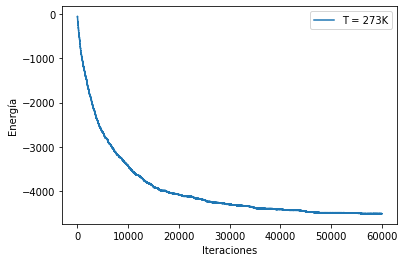

In [541]:
#Se grafica el valor de energia en funcion del tiempo
t = np.arange(0,len(np.array(Energia)))
plt.plot(t,np.array(Energia),label="T = 273K")
plt.legend()
plt.ylabel("Energía")
plt.xlabel("Iteraciones")

Text(0, 0.5, 'Magnetización')

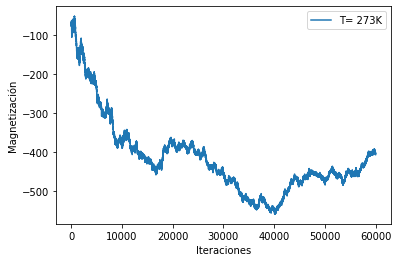

In [545]:
#se grafica el valor de magnetización en funcion del tiempo
plt.plot(t,np.array(M),label = "T= 273K")
plt.legend()
plt.xlabel("Iteraciones")
plt.ylabel("Magnetización")

In [579]:
#Aqui se calcula la magnetización para distintos valores de T

M50 = Magne(50)
M100 = Magne(100)
M150 = Magne(150)
M200 = Magne(200)
M250 = Magne(250)
M300 = Magne(300)
M350 = Magne(350)
M400 = Magne(400)
M450= Magne(450)
M500 = Magne(500)

In [578]:
#promedio magnetización despues de 30000 pasos
MP50 = np.average(M50[30000:-1])
MP100 = np.average(M100[30000:-1])
MP150 = np.average(M150[30000:-1])
MP200 = np.average(M200[30000:-1])
MP250 = np.average(M250[30000:-1])
MP300 = np.average(M300[30000:-1])
MP350 = np.average(M350[30000:-1])
MP400 = np.average(M400[30000:-1])
MP450 = np.average(M450[30000:-1])
MP500 = np.average(M500[30000:-1])


In [580]:
#mas valores de magnetización porque me di cuenta que T critica era grande
M1000 = Magne(1000)
M1500 = Magne(1500)
M2000 = Magne(2000)
M2500 = Magne(2500)
M3000 = Magne(3000)
M3500 = Magne(3500)
M4000 = Magne(4000)
M4500= Magne(4500)
M5000 = Magne(5000)

In [581]:
#mas promedio de magnetización
MP1000 = np.average(M1000[30000:-1])
MP1500 = np.average(M1500[30000:-1])
MP2000 = np.average(M2000[30000:-1])
MP2500 = np.average(M2500[30000:-1])
MP3000 = np.average(M3000[30000:-1])
MP3500 = np.average(M3500[30000:-1])
MP4000 = np.average(M4000[30000:-1])
MP4500 = np.average(M4500[30000:-1])
MP5000 = np.average(M5000[30000:-1])

In [590]:
#aquí se crea arreglo de magnetización y temperatura
MP = np.array([MP50,MP100,MP150,MP200,MP250,MP300,MP350,MP400,MP450,MP500,MP1000,MP1500,MP2000,MP2500,MP3000,MP3500,MP4000,MP4500,MP5000])
T= np.array([50,100,150,200,250,300,350,400,450,500,1000,1500,2000,2500,3000,3500,4000,4500,5000])

Text(0, 0.5, 'Magnetización promedio')

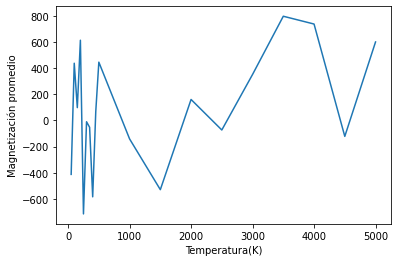

In [593]:
#grafica magnetización promedio contra temperatura
plt.plot(T,MP)
plt.xlabel("Temperatura(K)")
plt.ylabel("Magnetización promedio")